__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [4]:
X.shape

(10, 2)

In [5]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

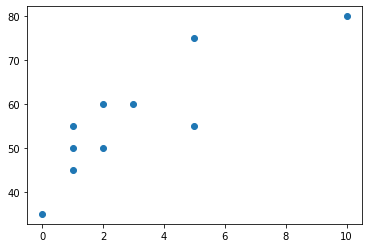

In [9]:
plt.scatter(X[:, 1], y);

In [10]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

**1. Подберите скорость обучения (eta) и количество итераций**

In [16]:
n = X.shape[0]

etas = [0.1, 0.01, 0.001, 0.0001]
n_iters = [10, 100, 200, 400, 600, 800, 1000]

best_error = np.inf
best_params = {}

for eta in etas:
    for n_iter in n_iters:
        W = np.array([1, 0.5])
        cur_eta = eta
        for i in range(n_iter):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= cur_eta * (1/n * 2 * X[:, k] @ (y_pred - y))
            if i % 10 == 0:
                cur_eta /= 1.1
                print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
        if err < best_error:
            best_error = err
            best_params = {
                'eta': eta,
                'n_iter': n_iter
            }
print(f'Лучшая ошибка {best_error} с параметрами {best_params}')

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888021 42641607.37852183], MSE = 9128819654907562.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815939e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500076e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126475981e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.64085895282839e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.12553353787446e+19
Iteration #90: W_new = [116395.49987587 641638.79864391], MSE = 31317286806394.35
Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 773

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [25]:
n = X.shape[0]

eta = 1e-2 
n_iter = 800

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
#    print(X.shape, (y_pred - y).shape)
#    print(W.shape)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        



Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [27]:
n = X.shape[0]

eta = 1e-2 
epsilon = 1e-8
iter_num = 0

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

weight_dist = np.inf

while weight_dist > epsilon:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    
    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    weight_dist = np.linalg.norm(W_new - W, ord=2)
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9